<a href="https://colab.research.google.com/github/NII-CODES/SP500-Stock-Prediction/blob/main/S%26P500_Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installed yfinance first since its not available in google colab to download stock data 


In [1]:
!pip install yfinance
import yfinance as yf


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Enables the ticker class

In [2]:
sp500 = yf.Ticker("^GSPC")

Using the history method to get all data on sp500 up to date

In [3]:
sp500 = sp500.history(period = "max")

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03 00:00:00-05:00,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04 00:00:00-05:00,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05 00:00:00-05:00,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06 00:00:00-05:00,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09 00:00:00-05:00,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...
2022-11-01 00:00:00-04:00,3901.790039,3911.790039,3843.800049,3856.100098,4481210000,0,0
2022-11-02 00:00:00-04:00,3852.899902,3894.439941,3758.679932,3759.689941,4899000000,0,0
2022-11-03 00:00:00-04:00,3733.250000,3750.590088,3698.149902,3719.889893,4625290000,0,0


Shows the index of the SP500 dataframe

In [5]:
sp500.index

DatetimeIndex(['1950-01-03 00:00:00-05:00', '1950-01-04 00:00:00-05:00',
               '1950-01-05 00:00:00-05:00', '1950-01-06 00:00:00-05:00',
               '1950-01-09 00:00:00-05:00', '1950-01-10 00:00:00-05:00',
               '1950-01-11 00:00:00-05:00', '1950-01-12 00:00:00-05:00',
               '1950-01-13 00:00:00-05:00', '1950-01-16 00:00:00-05:00',
               ...
               '2022-10-25 00:00:00-04:00', '2022-10-26 00:00:00-04:00',
               '2022-10-27 00:00:00-04:00', '2022-10-28 00:00:00-04:00',
               '2022-10-31 00:00:00-04:00', '2022-11-01 00:00:00-04:00',
               '2022-11-02 00:00:00-04:00', '2022-11-03 00:00:00-04:00',
               '2022-11-04 00:00:00-04:00', '2022-11-07 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=18332, freq=None)

Plots the closing price on the y-axis against the index(trading days) on the x-axis

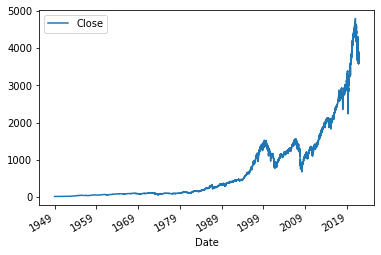

In [6]:
sp500.plot.line(y="Close", use_index=True)

Time to clean data by removing unwanted columns (dividends, stock splits)

In [7]:
del sp500["Dividends"]
del sp500["Stock Splits"]

Target

In [8]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

Set up a target which returns an integer to make it usable in a machine learning model

In [9]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [10]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1950-01-03 00:00:00-05:00,16.660000,16.660000,16.660000,16.660000,1260000,16.850000,1
1950-01-04 00:00:00-05:00,16.850000,16.850000,16.850000,16.850000,1890000,16.930000,1
1950-01-05 00:00:00-05:00,16.930000,16.930000,16.930000,16.930000,2550000,16.980000,1
1950-01-06 00:00:00-05:00,16.980000,16.980000,16.980000,16.980000,2010000,17.080000,1
1950-01-09 00:00:00-05:00,17.080000,17.080000,17.080000,17.080000,2520000,17.030001,0
...,...,...,...,...,...,...,...
2022-11-01 00:00:00-04:00,3901.790039,3911.790039,3843.800049,3856.100098,4481210000,3759.689941,0
2022-11-02 00:00:00-04:00,3852.899902,3894.439941,3758.679932,3759.689941,4899000000,3719.889893,0
2022-11-03 00:00:00-04:00,3733.250000,3750.590088,3698.149902,3719.889893,4625290000,3770.550049,1


Old data may not always be useful in predicting stocks. This step removes all data before 1990-01-01

In [11]:
sp500 = sp500.loc["1990-01-01":].copy()

Setting up machine learning model (Random Forest Classifier).
Using Random Forest because it's hard for them to overfit. Can pick up linear tendencies within the data and they run relatively fast.

In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100, min_samples_split=100, random_state = 1)
train = sp500.iloc[:-100] 
test = sp500.iloc[-100:]
predictors = ["Close", "Volume", "Open", "High", "Low" ]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

Importing an accuracy metric (precision score)

In [13]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])

In [15]:
import pandas as pd

preds = pd.Series(preds, index = test.index)

In [16]:
precision_score(test["Target"], preds)

0.4225352112676056

Time to combine the actual values with the predicted values in order to plot them

In [17]:
combined = pd.concat([test["Target"], preds], axis=1)

Plotting the actual valuesagainst the predicted values now

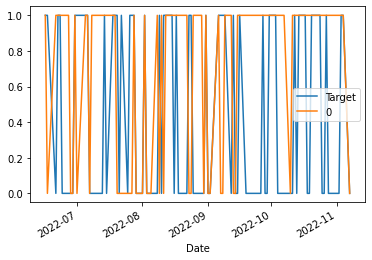

In [18]:
combined.plot()

Backtesting

In [19]:
def predict( train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [20]:
def backtest(data, model, predictors, start = 2500, step = 250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [21]:
predictions = backtest(sp500, model, predictors)

In [22]:
predictions["Predictions"].value_counts()

0    3342
1    2436
Name: Predictions, dtype: int64

In [23]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5320197044334976

In [ ]:
predictions["Target"].value_counts()/ predictions.shape[0]

In [26]:
horizons = [2, 3, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"].shift()

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]


In [27]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_3,Trend_3,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.990104,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.985961,0.0,0.983689,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,0.999590,1.0,0.995069,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01 00:00:00-04:00,3901.790039,3911.790039,3843.800049,3856.100098,4481210000,3759.689941,0,0.992173,0.0,0.998960,1.0,0.988352,24.0,0.912975,112.0,1.077464,543.0
2022-11-02 00:00:00-04:00,3852.899902,3894.439941,3758.679932,3759.689941,4899000000,3719.889893,0,0.972995,0.0,0.969897,0.0,0.964811,24.0,0.890828,111.0,1.050210,543.0
2022-11-03 00:00:00-04:00,3733.250000,3750.590088,3698.149902,3719.889893,4625290000,3770.550049,1,0.976889,0.0,0.971439,0.0,0.956081,23.0,0.882167,110.0,1.038793,543.0


In [28]:
sp500 = sp500.dropna()

In [29]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_3,Trend_3,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.996224,1.0,0.996678,1.0,1.000572,32.0,1.028299,127.0,1.176391,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.994530,0.0,0.994852,1.0,0.997648,32.0,1.025338,126.0,1.172983,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001925,1.0,0.999583,1.0,1.000568,32.0,1.028481,127.0,1.176485,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.008193,2.0,1.007852,2.0,1.006874,32.0,1.035021,128.0,1.183880,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,1.002130,1.0,1.004305,2.0,1.005417,32.0,1.033605,128.0,1.182192,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31 00:00:00-04:00,3881.850098,3893.729980,3863.179932,3871.979980,4820620000,3856.100098,0,1.004618,1.0,1.006671,1.0,0.991265,24.0,0.916077,113.0,1.082224,543.0
2022-11-01 00:00:00-04:00,3901.790039,3911.790039,3843.800049,3856.100098,4481210000,3759.689941,0,0.992173,0.0,0.998960,1.0,0.988352,24.0,0.912975,112.0,1.077464,543.0
2022-11-02 00:00:00-04:00,3852.899902,3894.439941,3758.679932,3759.689941,4899000000,3719.889893,0,0.972995,0.0,0.969897,0.0,0.964811,24.0,0.890828,111.0,1.050210,543.0


In [30]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [34]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [35]:
predictions = backtest(sp500, model, new_predictors)

In [36]:
predictions["Predictions"].value_counts()

0.0    3903
1.0     874
Name: Predictions, dtype: int64

In [38]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5583524027459954